In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns

In [9]:
df = pd.read_csv("C:\\Users\\HP\\Desktop\\Test Jupyter\\Iris.csv")

In [10]:
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [11]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
df.shape

(150, 6)

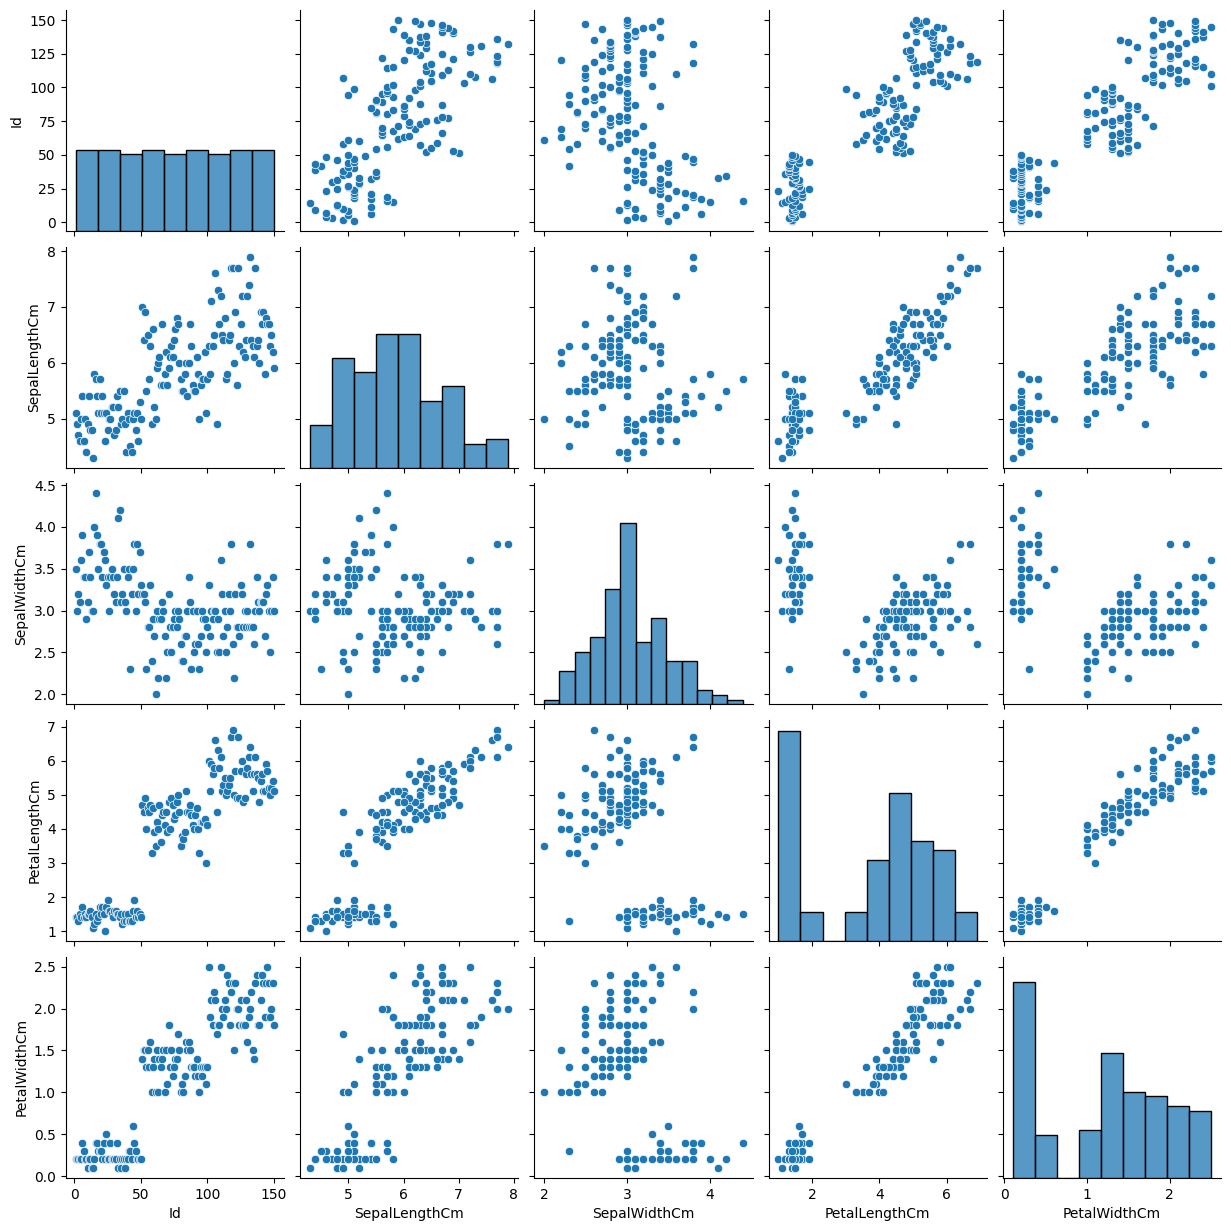

In [13]:
sns.pairplot(df)

In [14]:
def converter(s):
    s=s.lower()
    if s=='iris-setosa':
        return 1
    elif s=='iris-versicolor':
        return 2
    elif s=='iris-virginica':
        return 3
    else:
        return -1

In [15]:
data=pd.read_csv("C:\\Users\\HP\\Desktop\\Test Jupyter\\Iris.csv",converters={"Species":converter})

In [16]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [17]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,2.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,1.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,1.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,2.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,3.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,3.000000


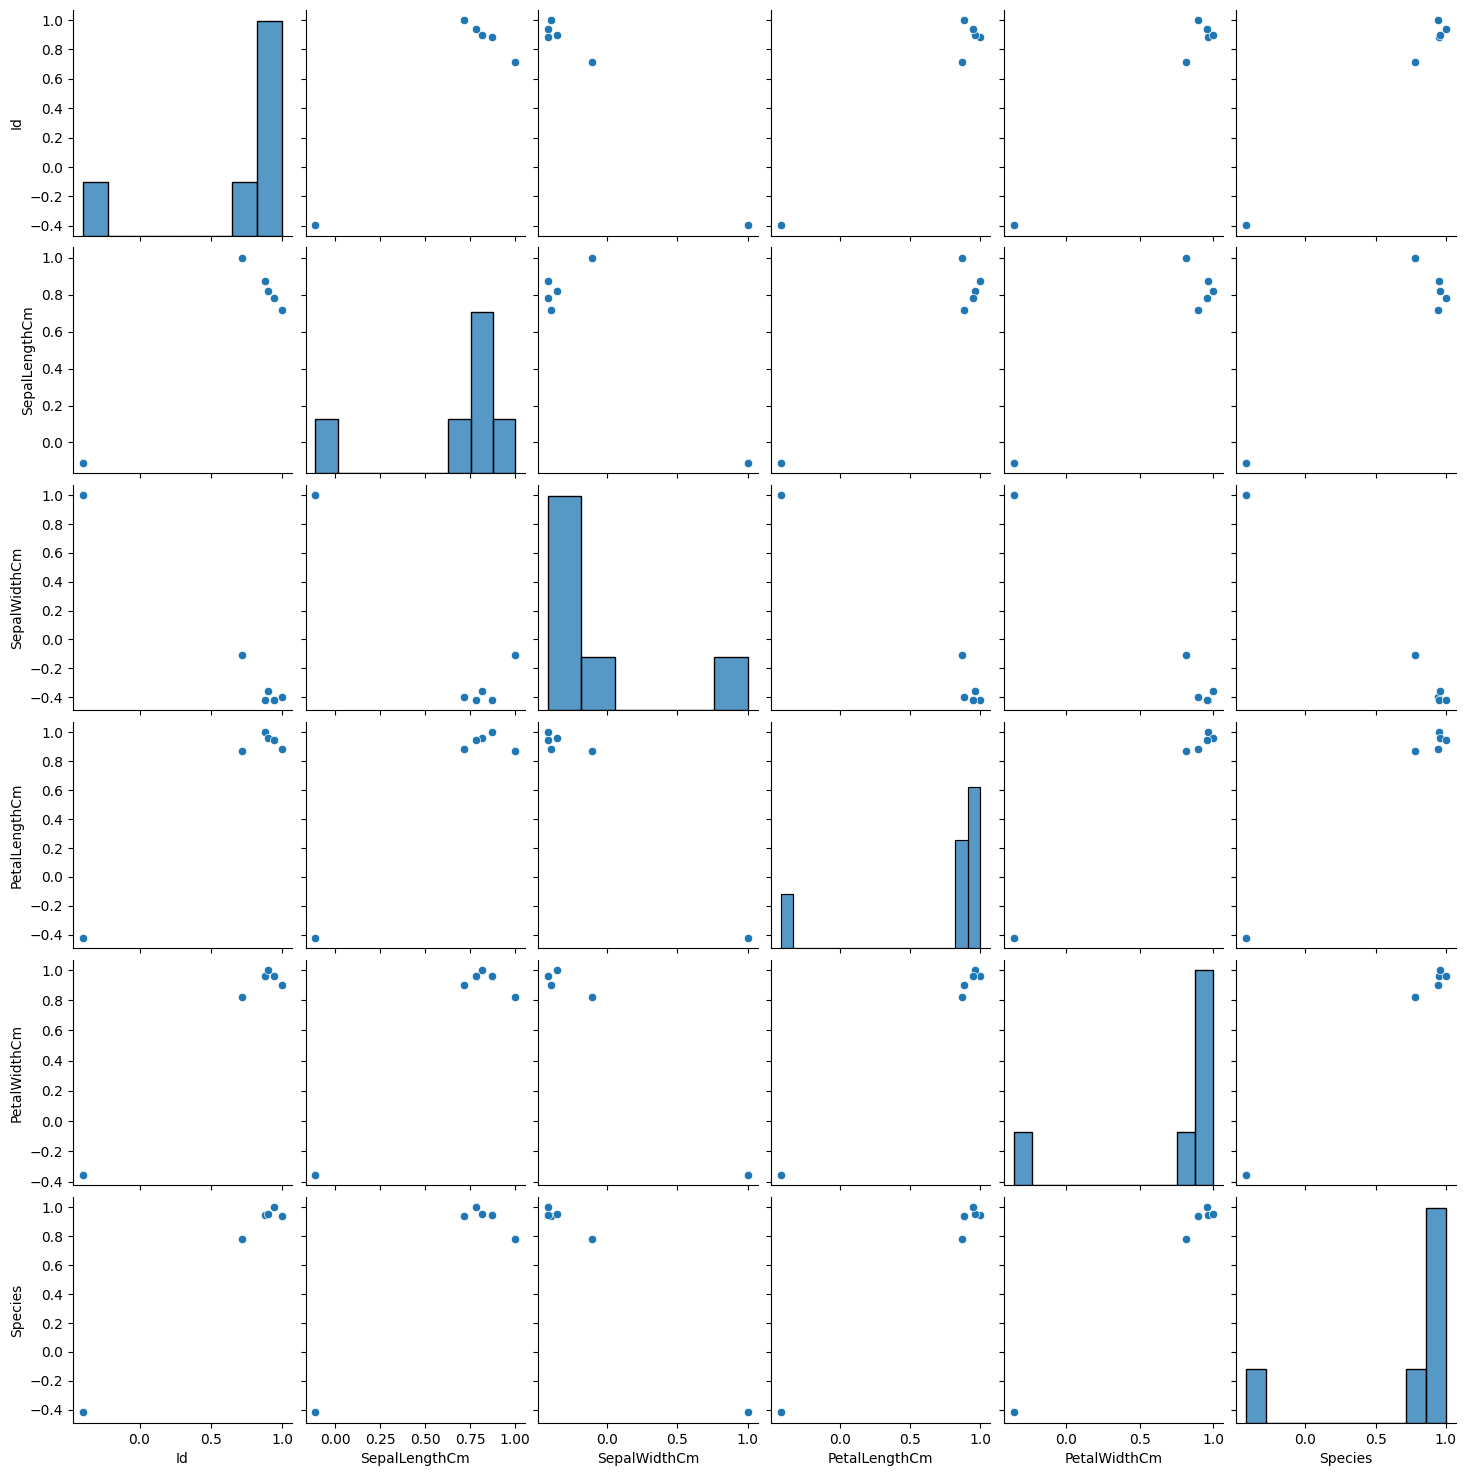

In [18]:
sns.pairplot(data.corr())

In [19]:
from sklearn.model_selection import train_test_split
X=data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=data['Species']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [20]:
print(y_train)

92     2
17     1
105    3
37     1
18     1
      ..
133    3
19     1
44     1
124    3
23     1
Name: Species, Length: 105, dtype: int64


In [21]:
print(X_train)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
92             5.8           2.6            4.0           1.2
17             5.1           3.5            1.4           0.3
105            7.6           3.0            6.6           2.1
37             4.9           3.1            1.5           0.1
18             5.7           3.8            1.7           0.3
..             ...           ...            ...           ...
133            6.3           2.8            5.1           1.5
19             5.1           3.8            1.5           0.3
44             5.1           3.8            1.9           0.4
124            6.7           3.3            5.7           2.1
23             5.1           3.3            1.7           0.5

[105 rows x 4 columns]


In [22]:
print(y_test)

38     1
83     2
82     2
57     2
140    3
145    3
93     2
99     2
67     2
41     1
86     2
85     2
148    3
25     1
66     2
1      1
113    3
144    3
119    3
54     2
90     2
4      1
9      1
3      1
138    3
13     1
121    3
53     2
14     1
35     1
24     1
128    3
42     1
147    3
98     2
89     2
131    3
134    3
101    3
15     1
130    3
79     2
110    3
8      1
69     2
Name: Species, dtype: int64


In [23]:
print(X_test)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
38             4.4           3.0            1.3           0.2
83             6.0           2.7            5.1           1.6
82             5.8           2.7            3.9           1.2
57             4.9           2.4            3.3           1.0
140            6.7           3.1            5.6           2.4
145            6.7           3.0            5.2           2.3
93             5.0           2.3            3.3           1.0
99             5.7           2.8            4.1           1.3
67             5.8           2.7            4.1           1.0
41             4.5           2.3            1.3           0.3
86             6.7           3.1            4.7           1.5
85             6.0           3.4            4.5           1.6
148            6.2           3.4            5.4           2.3
25             5.0           3.0            1.6           0.2
66             5.6           3.0            4.5           1.5
1       

In [24]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [25]:
regressor.intercept_

1.1439311125044636

In [26]:
regressor.coef_

array([-0.12382599, -0.01743588,  0.24527236,  0.58281909])

In [27]:
def calc(slope, intercept, hours):
    return slope*hours+intercept

In [28]:
d=calc(regressor.coef_,regressor.intercept_,8.5)

In [29]:
print(d)

[0.09141019 0.99572617 3.22874618 6.0978934 ]


In [30]:
y_pred= regressor.predict(X_test)

In [31]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'predicted': y_pred.squeeze()})

In [32]:
print(df_preds)

     Actual  predicted
38        1   0.982207
83        2   2.537298
82        2   2.034609
57        2   1.887556
140       3   3.032537
145       3   2.877890
93        2   1.876917
99        2   2.152584
67        2   1.967099
41        1   1.040311
86        2   2.287254
85        2   2.377929
148       3   2.981883
25        1   0.981493
66        2   2.376152
1         1   0.944821
113       3   2.786533
144       3   3.111859
119       3   2.463207
54        2   2.292723
90        2   2.196136
4         1   0.921977
9         1   0.909323
3         1   1.004753
138       3   2.575049
13        1   0.887253
121       3   2.769158
53        2   2.161540
14        1   0.766888
35        1   0.879897
24        1   1.072866
128       3   2.900070
42        1   0.978720
147       3   2.727809
98        2   1.845747
89        2   2.158053
131       3   2.834831
134       3   2.532731
101       3   2.736909
15        1   0.962441
130       3   2.782316
79        2   1.834062
110       3

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [34]:
print("mse:",mae)
print("mse:",mse)
print("rsme:",rmse)

mse: 0.1678906874076032
mse: 0.04837034047363527
rsme: 0.21993258165545929


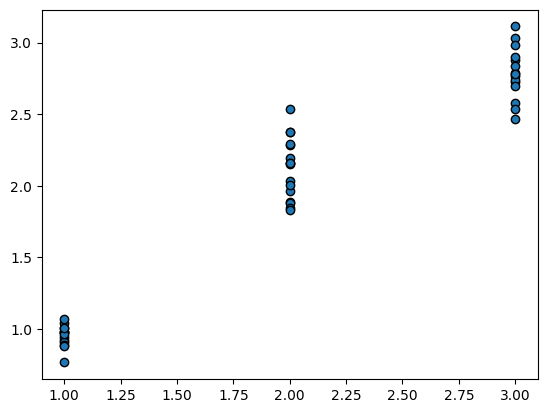

In [35]:
plt.scatter(y_test, y_pred, edgecolor='black')